# Model Validation

In [1]:
import sys
import warnings
import pandas as pd
import joblib

warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

sys.path.append("../../")

## Load Data

In [2]:
train = pd.read_csv("../../data/train.csv")
test = pd.read_csv("../../data/test.csv")

In [3]:
# separating the feature columns from the target column
feature_columns = [
    "battery_power",
    "has_bluetooth",
    "clock_speed",
    "has_dual_sim",
    "front_camera_megapixels",
    "has_four_g",
    "internal_memory",
    "depth",
    "weight",
    "number_of_cores",
    "primary_camera_megapixels",
    "pixel_resolution_height",
    "pixel_resolution_width",
    "ram",
    "screen_height",
    "screen_width",
    "talk_time",
    "has_three_g",
    "has_touch_screen",
    "has_wifi"
]

target_column = "price_range"

X_train = train[feature_columns]
y_train = train[target_column]

X_test = test[feature_columns]
y_test = test[target_column]

Getting the class names from the training set.

In [4]:
classes = train["price_range"].unique()

## Load Model

In [5]:
model = joblib.load("model.joblib")

## Create Classification Report

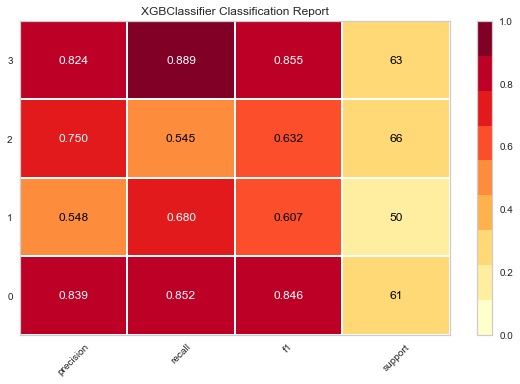

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

In [6]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.score(X_test, y_test)
visualizer.show()

## Create Confusion Matrix

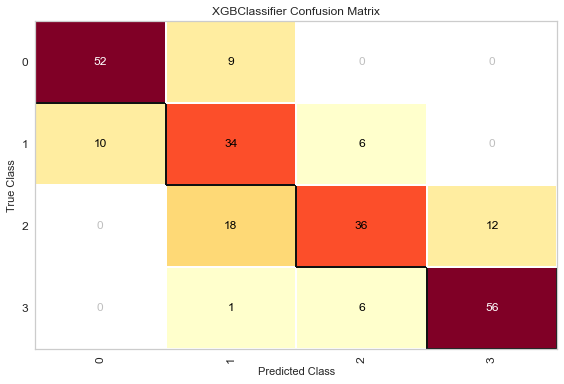

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [7]:
from yellowbrick.classifier import ConfusionMatrix

visualizer = ConfusionMatrix(model, classes=classes)
visualizer.score(X_test, y_test)
visualizer.show()

## Create ROC/AUC Plot

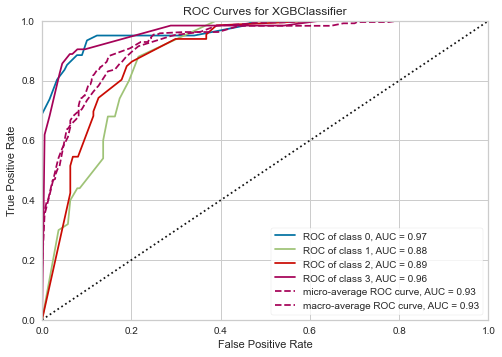

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [8]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(model, classes=classes)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## Create Class Prediction Error Plot

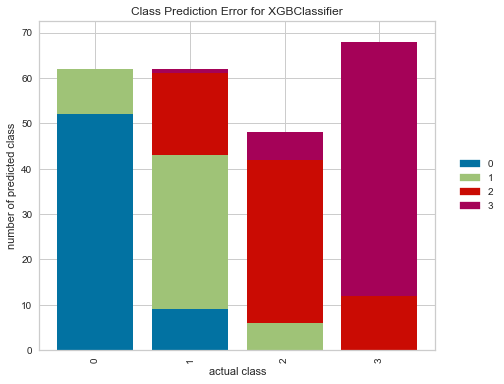

<AxesSubplot:title={'center':'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [9]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(model, classes=classes)

visualizer.score(X_test, y_test)
visualizer.show()